In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<AxesSubplot:>

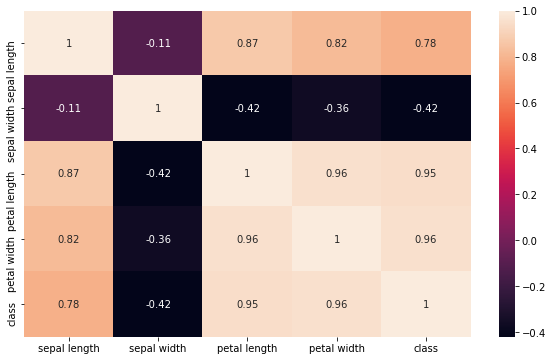

In [3]:
# no missing values
import seaborn as sns
dataset['class'] = dataset['class'].astype('category').cat.codes
correlation_matrix = dataset.corr().round(2)
%matplotlib inline
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True)

[]

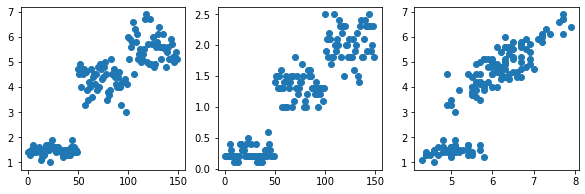

In [4]:
fig, (ax1, ax2, ax3) =  plt.subplots(1,3, figsize = (10,3))
Id = np.arange(150)
ax1.scatter(Id, dataset['petal length'])
ax2.scatter(Id, dataset['petal width'])
ax3.scatter(dataset['sepal length'], dataset['petal length'])
plt.plot()

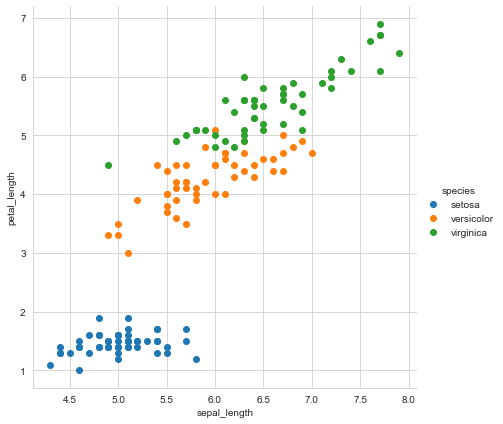

In [5]:
import seaborn as sns 
  
iris = sns.load_dataset('iris') 
  
# style used as a theme of graph  
# for example if we want black  
# graph with grid then write "blackgrid" 
sns.set_style("whitegrid") 
  
# sepal_length, petal_length are iris 
# feature data height used to define 
# Height of graph whereas hue store the 
# class of iris dataset. 
sns.FacetGrid(iris, hue ="species",  
              height = 6).map(plt.scatter,  
                              'sepal_length',  
                              'petal_length').add_legend()

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [10]:
# Spot Check Algorithms
models = []
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv = 10)
    results.append(cv_results)
    names.append(name)
    msg = f'{name} : {cv_results.mean()} ({cv_results.std()})'
    print(msg)

SVM : 0.975 (0.03818813079129868)
GNB : 0.9583333333333334 (0.06718548123582123)
RF : 0.9583333333333333 (0.05590169943749474)
KNN : 0.975 (0.03818813079129868)
DT : 0.9583333333333334 (0.05590169943749474)


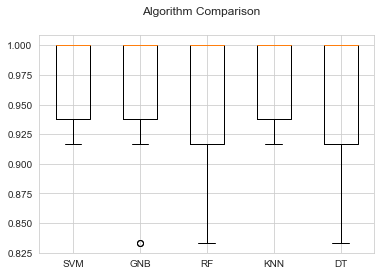

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
classifier = SVC()

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'sigmoid']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.50 %
Best Parameters: {'C': 0.75, 'kernel': 'linear'}


In [14]:
classifier = SVC(C = 0.75, kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=0.75, kernel='linear')

In [15]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7  0  0]
 [ 0  9  0]
 [ 0  1 13]]


0.9666666666666667

In [16]:
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.67 %
Standard Deviation: 2.67 %


## Best accuracy: 98.67% Standard deviation: 2.67%